In [6]:
import pandas as pd
df = pd.read_csv('Houses-Price-cairo-Egypt.csv')
rows_to_select = ['Location_City','Bed_Rooms','Bath_Rooms', 'Home_Space_SQM','Property_price_EGP']
df = df[rows_to_select]
nasr_city = df[df['Location_City'] == 'Nasr City']
nasr_city = nasr_city.sort_values(by='Property_price_EGP').reset_index()
nasr_city = nasr_city.drop(['Location_City', 'index'], axis=1).replace(',','', regex=True)
nasr_city = nasr_city.astype(int)
filtered_nasr_city = pd.DataFrame(columns=nasr_city.columns)
filtered_nasr_city = pd.concat([filtered_nasr_city, nasr_city.iloc[[0]]], ignore_index=True)
for i in range(1, len(nasr_city)):
    if (nasr_city.iloc[i] > filtered_nasr_city.iloc[-1]).all():
        filtered_nasr_city = pd.concat([filtered_nasr_city, nasr_city.iloc[[i]]], ignore_index=True)
nasr_city = filtered_nasr_city.copy(deep=True)
new_columns = ['الغرف', 'الحمامات', 'المساحة', 'السعر']
nasr_city.columns = new_columns
nasr_city['السعر'] = nasr_city['السعر'].apply(lambda x: f"{x:,}")
nasr_city.style.hide(axis="index") 

الغرف,الحمامات,المساحة,السعر
2,1,60,"1,200,000"
3,2,190,"1,600,000"
4,3,300,"3,400,000"
6,4,450,"3,750,000"


In [7]:
from keras_visualizer import visualizer
import graphviz
import re
import IPython


def remove_labels(keras_viz_source, no_labels_dot_file):
    # Read the original .dot file
    with open(keras_viz_source, 'r') as file:
        content = file.read()

    # Regular expression to match nodes with multi-line labels
    label_node_pattern = re.compile(
        r'^\s*\d+\s*\[label="(?:[^"]|\\")*"\s*(?:[^\]]*\s*)?\]$', re.MULTILINE
    )

    # Replace matched nodes with an empty string
    modified_content = re.sub(label_node_pattern, '', content)

    # Write the modified content back to a new .dot file
    with open(no_labels_dot_file, 'w') as file:
        file.write(modified_content)

def draw_from_source(source, output):
    # Load the .dot file
    with open(source, 'r') as file:
        dot_data = file.read()
    # Create a Graphviz source object
    dot = graphviz.Source(dot_data)

    # Render the graph to a file (e.g., PNG format)
    path = dot.render(output, format='png', cleanup=True, view=True)
    return path

def custom_visualizer(keras_viz_source = 'neural_network', no_labels_dot_file = 'nn_no_labels', png_render_file = 'model_no_labels'):
    remove_labels(keras_viz_source, no_labels_dot_file)
    return draw_from_source(no_labels_dot_file, png_render_file)


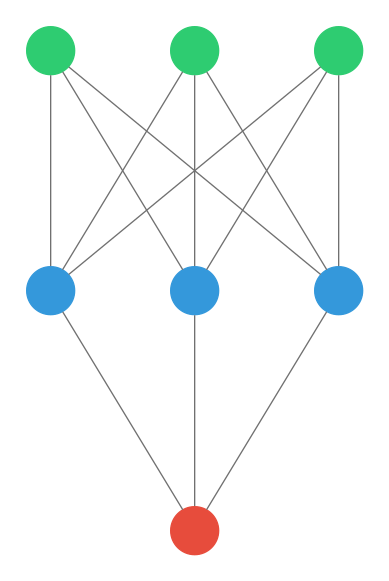

In [9]:
from keras import models, layers

model = models.Sequential([
    layers.Input((3,)),
    layers.Dense(3, activation='softmax'),
    layers.Dense(1)

])

# model.summary()
visualizer(model, file_name='neural_network', file_format='dot', view=False)

IPython.display.Image(filename=custom_visualizer(), width=200, height=200)

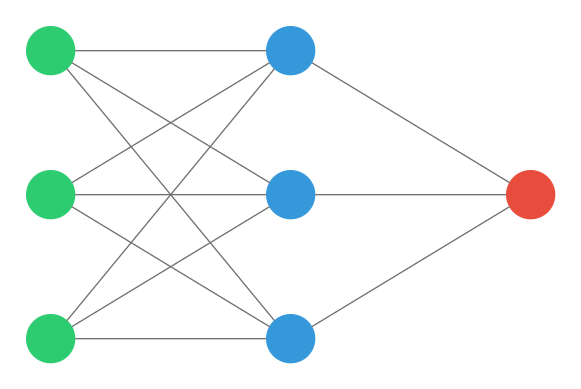

In [10]:
IPython.display.Image(filename=draw_from_source('nn_no_labels', 'lr_test'), width=200, height=200)